In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint as pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180) 

In [29]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=10)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=10)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['zhigansk', 'shahabad', 'busselton', 'narsaq', 'bambous virieux', 'dikson', 'hobart', 'puerto ayora', 'atuona', 'barrow']


In [30]:
# Save config info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query url and request results
query_url = f"{url}appid={weather_api_key}&units={units}&q=" 
# Set temperature from response
temp = []
humidity = []
cloudiness = []
wind_speed = []
# Create for loop for temperatures in city list
for city in cities:    
    response = requests.get(query_url + city).json()
    temp.append(response['main']['temp'])
    humidity.append(response['main']['humidity'])
    cloudiness.append(response['clouds']['all'])
    wind_speed.append(response['wind']['speed'])
    print(f"The temperature in {city} is {temp} C.")


The temperature in zhigansk is [55.29] C.
The temperature in shahabad is [55.29, 85.98] C.
The temperature in busselton is [55.29, 85.98, 53.04] C.
The temperature in narsaq is [55.29, 85.98, 53.04, 47.21] C.
The temperature in bambous virieux is [55.29, 85.98, 53.04, 47.21, 70.05] C.
The temperature in dikson is [55.29, 85.98, 53.04, 47.21, 70.05, 37.94] C.
The temperature in hobart is [55.29, 85.98, 53.04, 47.21, 70.05, 37.94, 43.93] C.
The temperature in puerto ayora is [55.29, 85.98, 53.04, 47.21, 70.05, 37.94, 43.93, 74.55] C.
The temperature in atuona is [55.29, 85.98, 53.04, 47.21, 70.05, 37.94, 43.93, 74.55, 78.71] C.
The temperature in barrow is [55.29, 85.98, 53.04, 47.21, 70.05, 37.94, 43.93, 74.55, 78.71, 36.46] C.


In [31]:
cities_df = pd.DataFrame({'Cities': cities, 'Latitude': lats, 'Longitude': lngs, 'Temperature': temp, 'Humidity': humidity, 'Cloudiness': cloudiness, 'Wind Speed': wind_speed})
cities_df

,Cities,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,zhigansk,69.278501,119.673576,55.29,75,6,14.83
1,shahabad,17.170840,76.992140,85.98,74,57,9.15
2,busselton,-65.988360,96.022635,53.04,70,100,15.43
3,narsaq,76.445302,-66.207292,47.21,87,92,5.19
4,bambous virieux,-28.085906,80.383755,70.05,83,75,5.75
5,dikson,76.343615,78.255167,37.94,96,100,25.75
6,hobart,-87.059189,149.472506,43.93,73,100,3.00
7,puerto ayora,-15.852764,-94.534072,74.55,81,15,8.99
8,atuona,-10.871439,-137.734927,78.71,68,72,16.33
9,barrow,86.133128,-160.127445,36.46,94,100,0.85


Text(0, 0.5, 'Temperature')

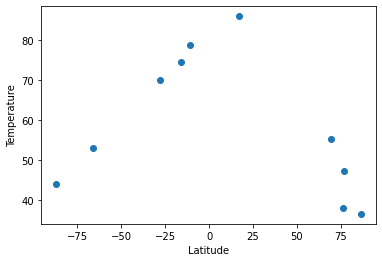

In [32]:
# Temperature (F) vs. Latitude
plt.scatter(cities_df['Latitude'], cities_df['Temperature'])
plt.xlabel('Latitude')
plt.ylabel('Temperature')

Text(0, 0.5, 'Humidity')

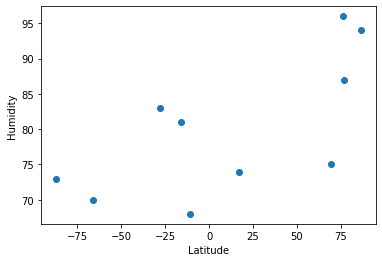

In [36]:
# Humidity (%) vs Latitude
plt.scatter(cities_df['Latitude'], cities_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')

Text(0, 0.5, 'Cloudiness')

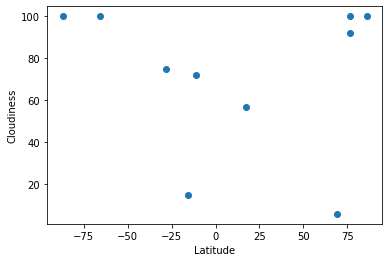

In [35]:
# Cloudiness (%) vs Latitude
plt.scatter(cities_df['Latitude'], cities_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

Text(0, 0.5, 'Wind Speed')

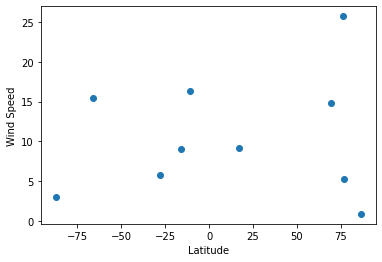

In [39]:
# Wind Speed (mph) vs. Latitude
plt.scatter(cities_df['Latitude'], cities_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')